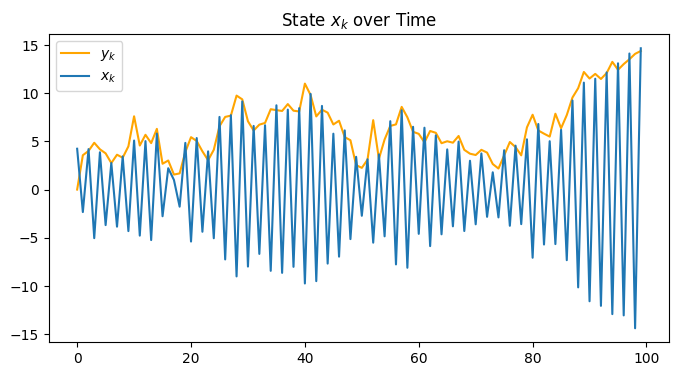

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
a = -1  # The unknown constant we are simulating
num_observations = 100  # Number of observations

# Initial state
x0_mean = 1
x0_var = 2
x0 = np.random.normal(x0_mean, np.sqrt(x0_var))

# Pre-allocate space for x and y
x = np.zeros(num_observations)
y = np.zeros(num_observations)
x[0] = x0

# Simulate the system
for k in range(1, num_observations):
    epsilon_k = np.random.normal(0, 1)  # System noise
    x[k] = a * x[k-1] + epsilon_k
    nu_k = np.random.normal(0, np.sqrt(0.5))  # Observation noise
    y[k] = np.sqrt(x[k]**2 + 1) + nu_k

# Plotting the system
plt.figure(figsize=(8, 4))
plt.plot(y, label='$y_k$', color='orange')
plt.plot(x, label='$x_k$')
plt.title('State $x_k$ over Time')
plt.legend()
plt.show()




In [2]:
import numpy as np

# Define the initial state and covariance


# Process and measurement noise covariance matrices
Q = np.array([[1, 0], [0, 0.001]])
R = np.array([[0.5]])

def f(x):
    """System dynamics model."""
    return np.array([[x[1, 0] * x[0, 0]], [x[1, 0]]])

def h(x):
    """Measurement model."""
    return np.sqrt(x[0, 0]**2 + 1)

def F(x):
    """Jacobian of the system dynamics model."""
    return np.array([[x[1, 0], x[0, 0]], [0, 1]])

def H(x):
    """Jacobian of the measurement model."""
    return np.array([[x[0, 0] / np.sqrt(x[0, 0]**2 + 1), 0]])


mu = [0] * (num_observations+1)
P = [0] * (num_observations+1)

mu[0] = np.array([[1], [-5]])  # Initial state: x_0 and estimate for 'a'
P[0] = np.array([[2, 0], [0, 10]])  # Initial covariance: var(x_0) = 2, var(a) = 10

for k in range(len(y)):
    
    # print(x)
    # print(P)
    # Prediction
    mu_pred = f(mu[k])
    P_pred = F(mu[k]) @ P[k] @ F(mu[k]).T + Q
    
    # Update
    S = H(mu_pred) @ P_pred @ H(mu_pred).T + R
    K = P_pred @ H(mu_pred).T @ np.linalg.inv(S)
    y_pred = h(mu_pred)
    
    mu[k+1] = (mu_pred + K * (y[k] - y_pred))
    P[k+1] = P_pred - K @ H(mu_pred) @ P_pred

estimates = np.array(mu)

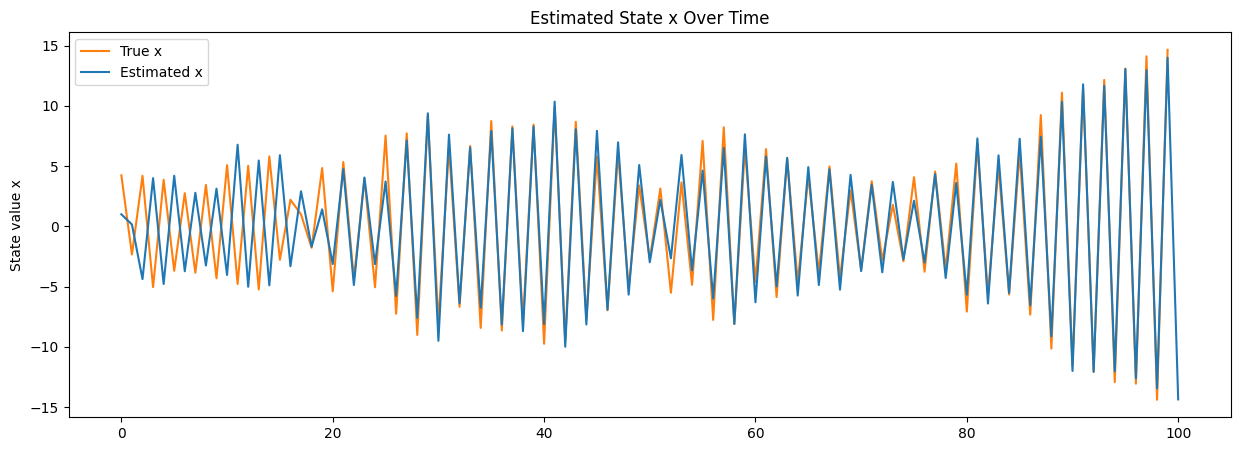

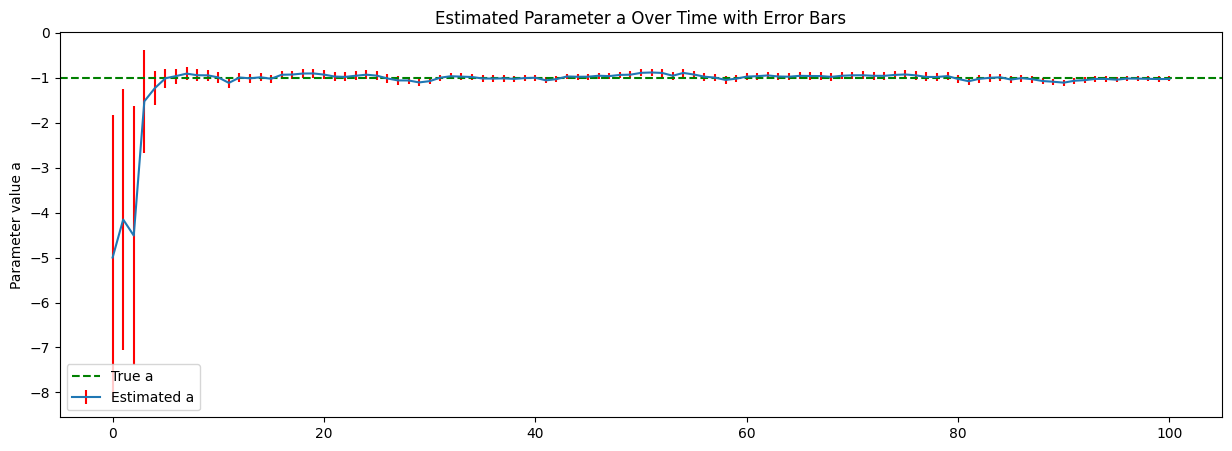

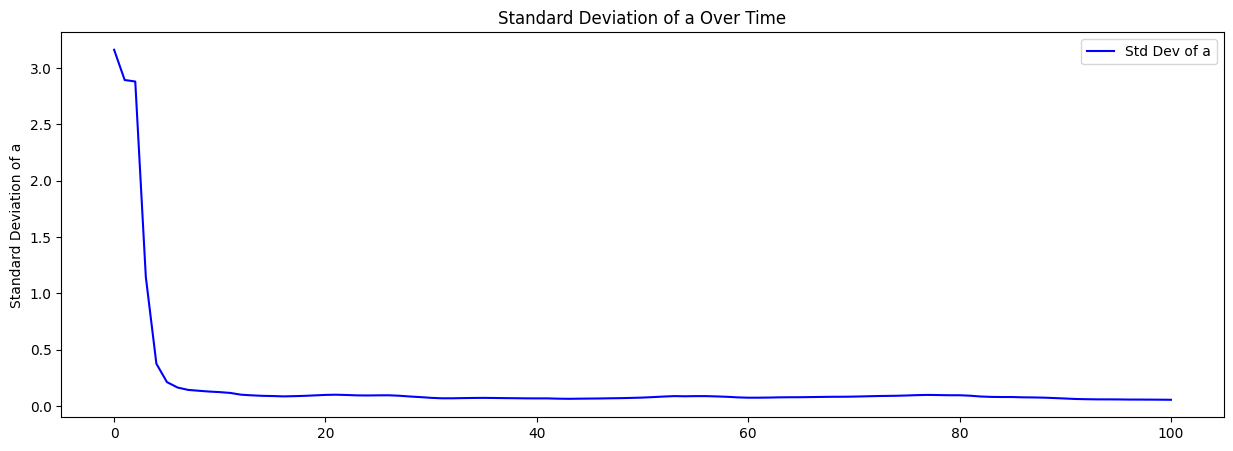

In [3]:
# If you want to plot the results:
import matplotlib.pyplot as plt

std_devs_x = np.sqrt([P[0, 0] for P in P])

std_devs_a = np.sqrt([P[1, 1] for P in P])

plt.figure(figsize=(15, 5))
plt.errorbar(range(len(estimates)), estimates[:, 0], label='Estimated x',linestyle='-')
plt.plot(x, label='True x', linestyle='-')
plt.ylabel('State value x')
plt.title('Estimated State x Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

plt.errorbar(range(len(std_devs_a)), estimates[:, 1, 0], yerr=std_devs_a, label='Estimated a',ecolor='red')
plt.axhline(y=-1, color='green', linestyle='--', label='True a')
plt.ylabel('Parameter value a')
plt.title('Estimated Parameter a Over Time with Error Bars')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(range(len(std_devs_a)), std_devs_a, label='Std Dev of a', color='blue', linestyle='-')
plt.ylabel('Standard Deviation of a')
plt.title('Standard Deviation of a Over Time')
plt.legend()
plt.show()